In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

## Univariate
*       How many variables do I have?
*       How many datapoints?
*       Which variables are continuous (having an infinite number of possible values, such as age) and which are categorical (having a limited number of values, such as gender).
*       Do any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?
*       Do I have missing data? If so, how much?
*    How much variance is there in each of my variables?
If you’ve cleaned this dataset yourself, you’ll probably already know the answers to most of these questions.

## Bi-variate (2 or more variables)
Use **Exploring The Data**

In [2]:
sns.set_style("white")

In [3]:
df = pd.read_csv('winequality-white.csv', delimiter = ";")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Quality is target feature

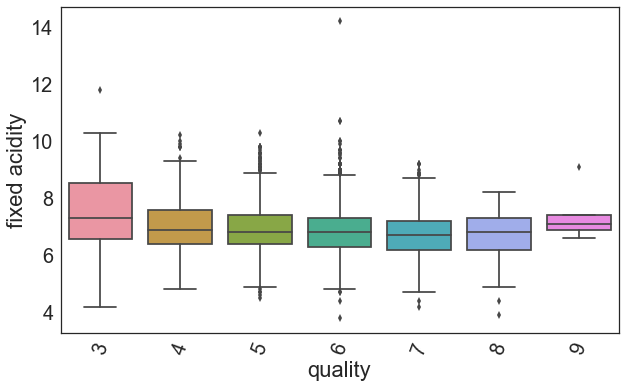

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="quality", y="fixed acidity", data=df)
plt.xticks(rotation=70)
plt.show()

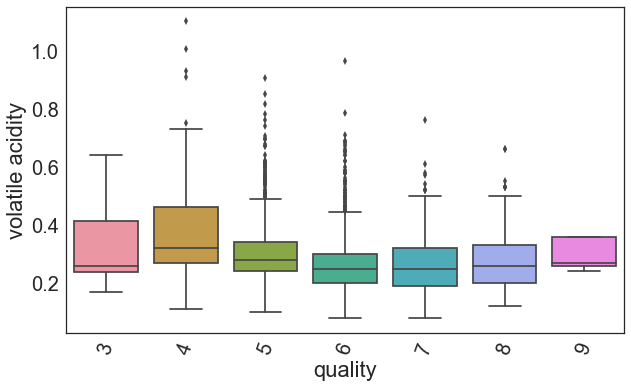

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="quality", y="volatile acidity", data=df)
plt.xticks(rotation=70)
plt.show()

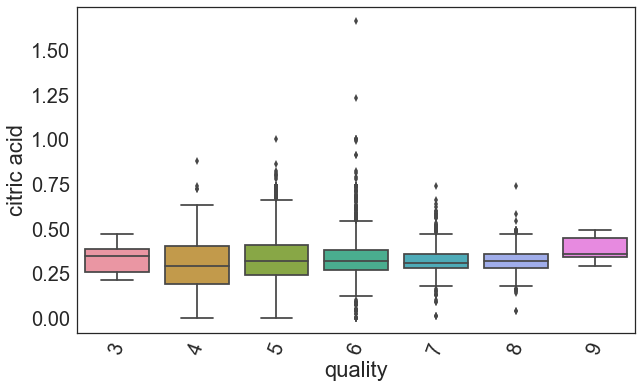

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="quality", y="citric acid", data=df)
plt.xticks(rotation=70)
plt.show()

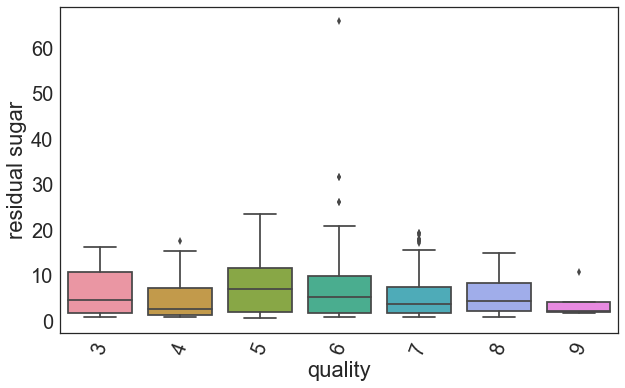

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="quality", y="residual sugar", data=df)
plt.xticks(rotation=70)
plt.show()

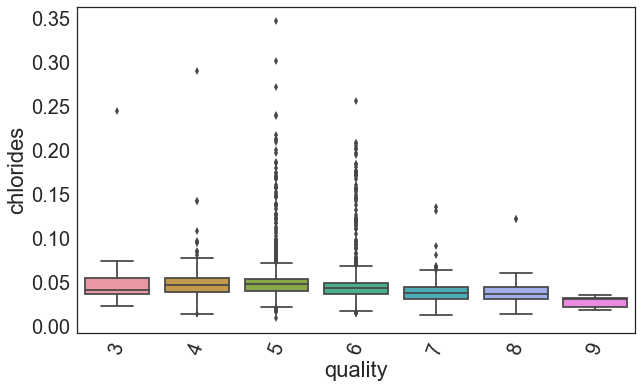

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="quality", y="chlorides", data=df)
plt.xticks(rotation=70)
plt.show()

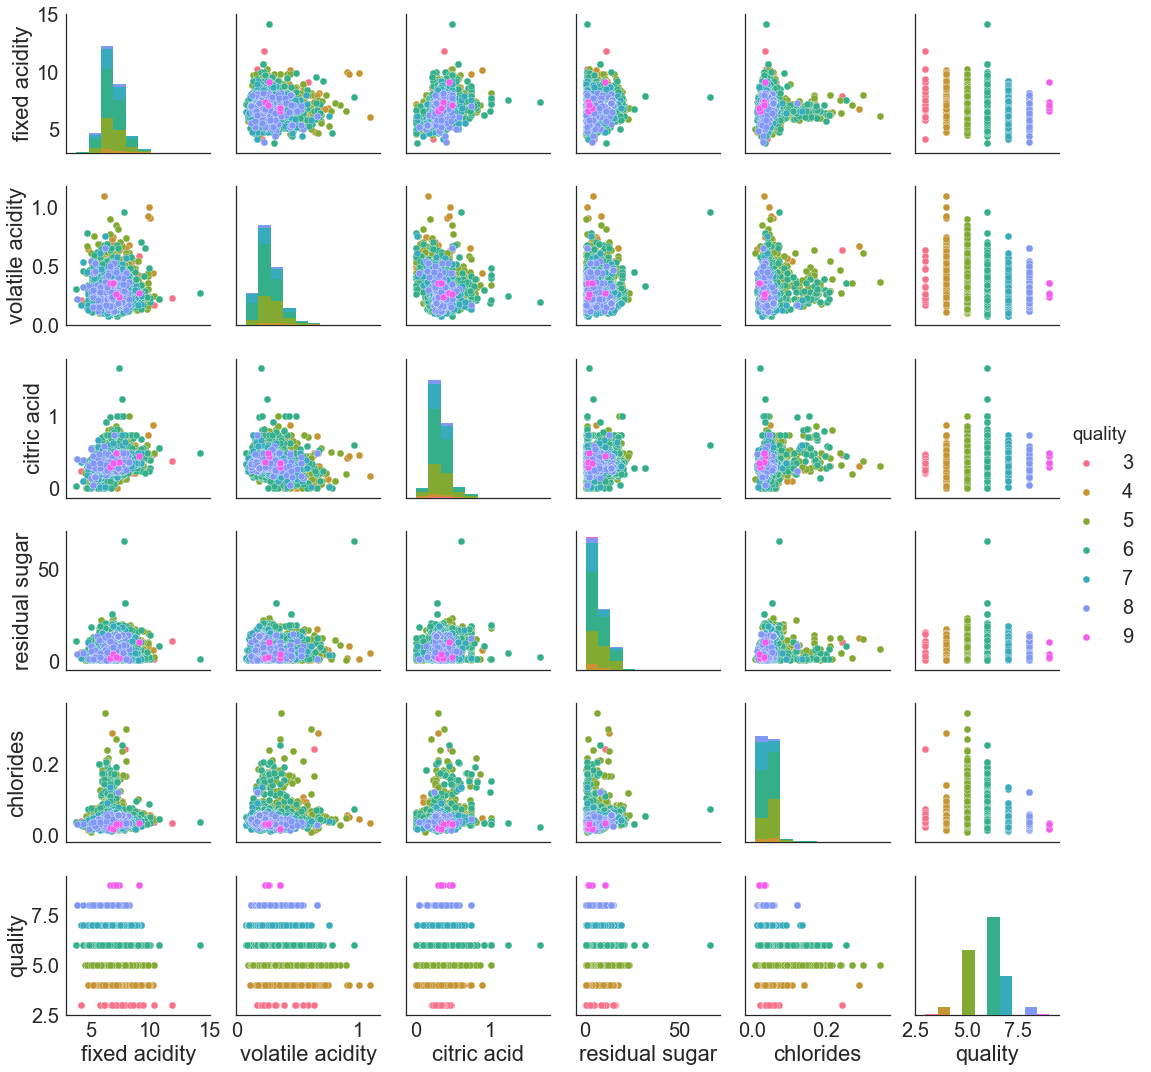

In [10]:
g = sns.pairplot(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'quality']], 
                     hue="quality")

In [51]:
# We chose fixed acidity and volatile acidity because of a slight correlation with quality.

In [11]:
df['fa_x_ca'] = df['fixed acidity'] * df['citric acid']

In [12]:
df['fa_d_ca'] = df['fixed acidity'] / df['citric acid']

In [13]:
df['va_x_ca'] = df['volatile acidity'] * df['citric acid']

In [14]:
df['va_d_ca'] = df['volatile acidity'] / df['citric acid']

In [22]:
df['fa_low'] = df['fixed acidity'] <= 5

In [34]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fa_x_ca,fa_d_ca,va_x_ca,va_d_ca,fa_low,fa_high,va_low,va_high
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2.520,19.444444,0.0972,0.750000,False,False,True,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2.142,18.529412,0.1020,0.882353,False,False,True,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,3.240,20.250000,0.1120,0.700000,False,False,True,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2.304,22.500000,0.0736,0.718750,False,False,True,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2.304,22.500000,0.0736,0.718750,False,False,True,False


In [35]:
df['fa_low'] = np.where(df['fixed acidity'] <= 5, 1, 0)

In [36]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fa_x_ca,fa_d_ca,va_x_ca,va_d_ca,fa_low,fa_high,va_low,va_high
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2.520,19.444444,0.0972,0.750000,0,False,True,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2.142,18.529412,0.1020,0.882353,0,False,True,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,3.240,20.250000,0.1120,0.700000,0,False,True,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2.304,22.500000,0.0736,0.718750,0,False,True,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2.304,22.500000,0.0736,0.718750,0,False,True,False


In [37]:
#df fa_med
df['fa_med'] = np.where((df['fixed acidity'] >= 5) & (df['fixed acidity'] <= 10), 1, 0)

In [38]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,quality,fa_x_ca,fa_d_ca,va_x_ca,va_d_ca,fa_low,fa_high,va_low,va_high,fa_med
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,...,6,2.520,19.444444,0.0972,0.750000,0,False,True,False,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,...,6,2.142,18.529412,0.1020,0.882353,0,False,True,False,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,...,6,3.240,20.250000,0.1120,0.700000,0,False,True,False,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,...,6,2.304,22.500000,0.0736,0.718750,0,False,True,False,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,...,6,2.304,22.500000,0.0736,0.718750,0,False,True,False,1


In [39]:
#df fa_high
df['fa_high'] = np.where(df['fixed acidity'] >= 10, 1, 0)

In [41]:
df[df['fixed acidity'] >= 10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,quality,fa_x_ca,fa_d_ca,va_x_ca,va_d_ca,fa_low,fa_high,va_low,va_high,fa_med
207,10.2,0.44,0.88,6.2,0.049,20.0,124.0,0.9968,2.99,0.51,...,4,8.976,11.590909,0.3872,0.500000,0,1,True,False,0
358,10.0,0.20,0.39,1.4,0.050,19.0,152.0,0.9940,3.00,0.42,...,6,3.900,25.641026,0.0780,0.512821,0,1,True,False,1
873,10.3,0.17,0.47,1.4,0.037,5.0,33.0,0.9939,2.89,0.28,...,3,4.841,21.914894,0.0799,0.361702,0,1,True,False,0
1239,10.3,0.25,0.48,2.2,0.042,28.0,164.0,0.9980,3.19,0.59,...,5,4.944,21.458333,0.1200,0.520833,0,1,True,False,0
1372,10.7,0.22,0.56,8.2,0.044,37.0,181.0,0.9980,2.87,0.68,...,6,5.992,19.107143,0.1232,0.392857,0,1,True,False,0
1373,10.7,0.22,0.56,8.2,0.044,37.0,181.0,0.9980,2.87,0.68,...,6,5.992,19.107143,0.1232,0.392857,0,1,True,False,0
1526,14.2,0.27,0.49,1.1,0.037,33.0,156.0,0.9920,3.15,0.54,...,6,6.958,28.979592,0.1323,0.551020,0,1,True,False,0
1856,10.0,0.91,0.42,1.6,0.056,34.0,181.0,0.9968,3.11,0.46,...,4,4.200,23.809524,0.3822,2.166667,0,1,True,False,1
1900,10.0,0.23,0.27,14.1,0.033,45.0,166.0,0.9988,2.72,0.43,...,6,2.700,37.037037,0.0621,0.851852,0,1,True,False,1
2050,11.8,0.23,0.38,11.1,0.034,15.0,123.0,0.9997,2.93,0.55,...,3,4.484,31.052632,0.0874,0.605263,0,1,True,False,0


In [42]:
#df va_low
df['va_low'] = np.where(df['volatile acidity'] <= 5, 1, 0)

In [43]:
#df fa_med
df['va_med'] = np.where((df['volatile acidity'] >= 5) & (df['volatile acidity'] <= 10), 1, 0)

In [44]:
df['va_high'] = np.where(df['volatile acidity'] >= 10, 1, 0)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   
fa_x_ca                    0.551704         -0.121250     0.950503   
fa_d_ca             

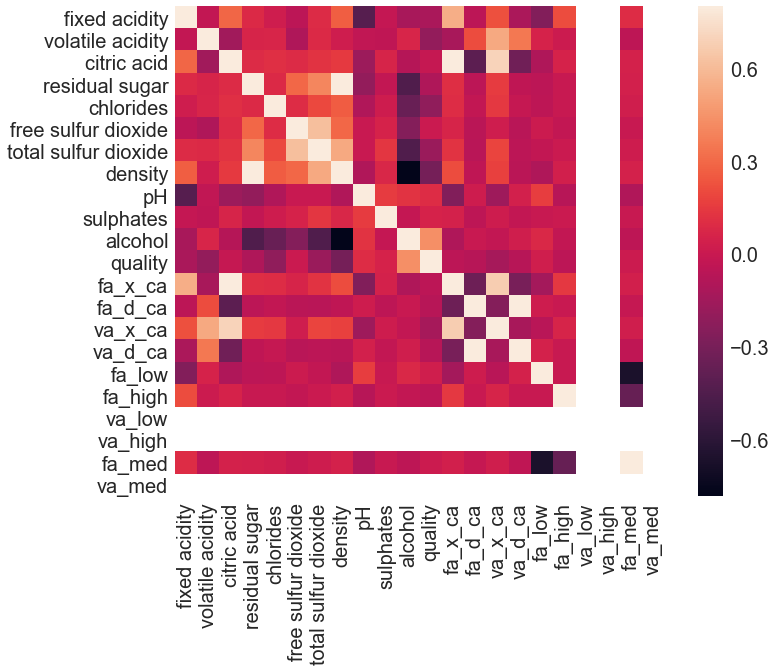

In [46]:
# Make the correlation matrix.
# use df.corr(), if messy, use filtering like in pairplot above - make sure to include quality in both since it
# is the important column
corrmat = df.corr()
print(corrmat)
df1 = pd.DataFrame(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [47]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,fa_x_ca,fa_d_ca,va_x_ca,va_d_ca,fa_low,fa_high,va_low,va_high,fa_med,va_med
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,...,0.551704,-0.048943,0.223293,-0.111837,-0.256654,0.212555,NaN,NaN,0.100678,NaN
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,...,-0.121250,0.210233,0.533413,0.351716,0.056939,0.016048,NaN,NaN,-0.041413,NaN
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,...,0.950503,-0.397746,0.697867,-0.325336,-0.098505,0.058239,NaN,NaN,0.049983,NaN
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,...,0.107823,-0.045808,0.157151,-0.038839,-0.046374,-0.007504,NaN,NaN,0.042766,NaN
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,...,0.098813,-0.023689,0.142128,-0.012518,-0.044814,-0.006568,NaN,NaN,0.032767,NaN


In [50]:
df1['quality']

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
fa_x_ca                -0.051206
fa_d_ca                -0.066700
va_x_ca                -0.128887
va_d_ca                -0.067861
fa_low                  0.030012
fa_high                -0.049948
va_low                       NaN
va_high                      NaN
fa_med                  0.014599
va_med                       NaN
Name: quality, dtype: float64

In [33]:
# top five features correlating with quality
# 1 - Alcohol
# 2 - Density
# 3 - Chlorides
# 4 - Volatile Acidity
# 5 - Total Sulfur Dioxide